# Vue 03 Basic Syntax 02

## Computed Properties

### Computed

#### computed() 
"계산된 속성"을 정의하는 함수 
- >미리 계산된 속성을 사용하여 템플릿에서 표현식을 단순하게 하고 불필요한 반복 연산을 줄임

#### computed가 필요한 경우
- 할 일이 남았는지 여부에 따라 다른 메시지를 출력하기 
```html
<!-- computed.html -->
``` 
```js
const todos = ref([ 
    { text: 'Vue 실습' }, 
    { text: '자격증 공부'}, 
    { text: 'TIL 작성' } 
]}

<h2>남은 할 일</h2> 
<p>{{ todos.length > 0 ? '아직 남았다' : '퇴근!' }}</p>
```
- >템플릿이 복잡해지며 todos에 따라 계산을 수행하게 됨 
- >만약 이 계산을 템플릿에 여러 번 사용하는 경우에는 반복이 발생

- computed 적용 후 
- 반응형 데이터를 포함하는 복잡한 로직의 경우 computed를 활용하여 미리 값을 계산하여 계산된 값을 사용 
```js
const { createApp, ref, computed } = Vue 

const restOfTodos = computed(() => { 
    return todos.value.length > 0? '아직 남았다' : '퇴근!'
})  

<h2>남은 할 일</h2> 
<p>{{ restOfTodos }}</p>
```

#### computed 특징
- 반환되는 값은 computed ref이며 일반 refs와 유사하게 계산된 결과를 .value로 참조 할 수 있음 (템플릿에서는 .value 생략 가능)

- computed 속성은 `의존된` 반응형 데이터를 자동으로 추적 의존하는 데이터가 `변경될 때만 재평가` 
- restOfTodos의 계산은 todos에 의존하고 있음 
- 따라서 todos가 변경될 때만 restOfTodos가 업데이트 됨 
```js
const restOfTodos = computed(() => { 
    return todos.value.length > 0 ? '아직 남았다' : '퇴근!' 
})

### Computed vs. Methods

#### computed와 동일한 로직을 처리할 수 있는 method 
computed 속성 대신 method로도 동일한 기능을 정의할 수 있음 
```html
<!-- computed.html --> 
```
```js
const getRestOfTodos = function () { 
    return todos.value.length > 0? '아직 남았다' : '퇴근!' 
} 

<p>{{ getRestOfTodos() }}</p>
```

#### computed와 method 차이 
- computed 속성은 `의존된 반응형 데이터를 기반으로 캐시(cached)` 됨 

- 의존하는 데이터가 변경된 경우에만 재평가됨 
- 즉, 의존된 반응형 데이터가 변경되지 않는 한 이미 계산된 결과에 대한 여러 참조는 다시 평가할 필요 없이 이전에 계산된 결과를 즉시 반환 
- >반면, method 호출은 다시 렌더링이 발생할 때마다 `항상 함수를 실행`

#### Cache (캐시) 
- 데이터나 결과를 일시적으로 저장해두는 임시 저장소 

- 이후에 같은 데이터나 결과를 다시 계산하지 않고 빠르게 접근할 수 있도록 함

#### Cache 예시 
- “웹 페이지의 캐시 데이터" 
- 과거 방문한 적이 있는 페이지에 다시 접속할 경우 

- 페이지 일부 데이터를 브라우저 캐시에 저장 후 같은 페이지에 다시 요청 시 모든 데이터를 다시 응답 받는 것이 아닌 일부 캐시 된 데이터를 사용하여 더 빠르게 웹 페이지를 렌더링

    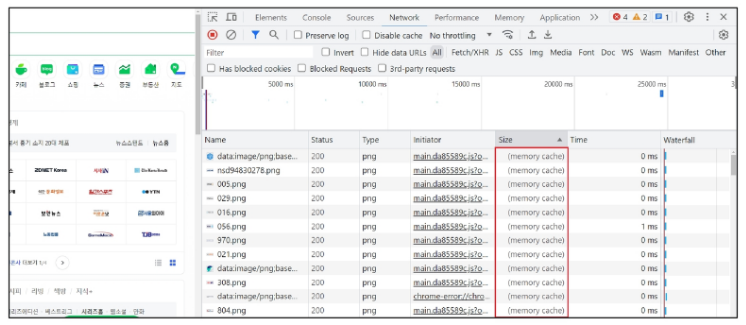

#### computed와 method의 적절한 사용처 
- computed 
    - 의존하는 데이터에 따라 결과가 바뀌는 계산된 속성을 만들 때 유용 
    - 동일한 의존성을 가진 여러 곳에서 사용할 때 계산 결과를 캐싱하여 중복 계산 방지 

- method 
    - 단순히 특정 동작을 수행하는 함수를 정의할 때 사용 
    - 데이터에 의존하는지 여부와 관계없이 항상 동일한 결과를 반환하는 함수

#### method와 computed 정리 
- computed
    - 의존된 데이터가 변경되면 자동으로 업데이트 
- method 
    - 호출해야만 실행됨 


- >무조건 computed만 사용하는 것이 아니라 사용 목적과 상황에 맞게 computed와 method를 적절히 조합하여 사용

## Conditional Rendering

### v-if

#### v-if 
표현식 값의 true/false를 기반으로 요소를 조건부로 렌더링

#### v-if 활용
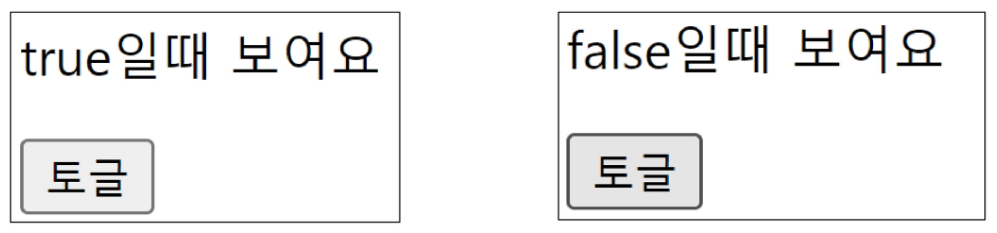

#### v-if 
'v-if' directive를 사용하여 조건부로 렌더링 
```html
<!-- conditional-rendering.html -->
```
```js
const isSeen = ref(true) 

<p v-if="isSeen">true일때 보여요</p>
```

#### v-else 
'v-else' directive를 사용하여 v-if에 대한 else 블록을 나타낼 수 있음 
```html
<!-- conditional-rendering.html -->
```
```js
const isSeen = ref(true) 
<p v-if="isSeen">true일때 보여요</p> 
<p v-else>false일때 보여요</p> 
<button @click="isSeen = !isSeen">토글</button>
```

#### v-else-if 
'v-else-if' directive를 사용하여 v-if에 대한 else if 블록을 나타낼 수 있음 
```js
const name = ref('Cathy') 

<div v-if="name === 'Alice'">Alice입니다</div> 
<div v-else-if="name === 'Bella'">Bella입니다</div> 
<div v-else-if="name === 'Cathy'">Cathy입니다</div> 
<div v-else>아무도 아닙니다.</div>
```

#### 여러 요소에 대한 v-if 적용 
HTML template 요소에 v-if를 사용하여 하나 이상의 요소에 대해 적용 할 수 있음 (v-else, v-else-if 모두 적용 가능) 
```html
<template v-if="name === 'Cathy'"> 
    <div>Cathy입니다</div> 
    <div>나이는 30살입니다</div> 
</template>
```
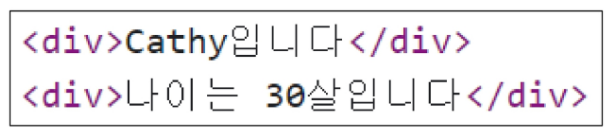

#### HTML `<template>` element 
- 페이지가 로드 될 때 렌더링 되지 않지만 JavaScript를 사용하여 나중에 문서에서 사용할 수 있도록 하는 HTML을 보유하기 위한 메커니즘 

- > “보이지 않는 wrapper 역할"

### v-if vs. v-show

#### v-show 
표현식 값의 true/false를 기반으로 요소의 가시성(visibility)을 전환

#### v-show 예시 
- v-show 요소는 항상 DOM에 렌더링 되어있음 
- CSS display 속성만 전환하기 때문 
```js
const isShow = ref(false) 

<div v-show="isShow">v-show</div>
```
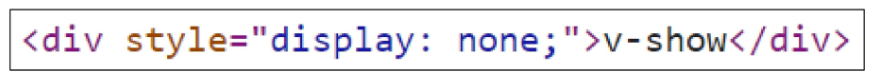

#### v-if와 v-show의 적절한 사용처 
- v-if (Cheap initial load, expensive toggle) 
    - 초기 조건이 false인 경우 아무 작업도 수행하지 않음 
    - 토글 비용이 높음 

- v-show (Expensive initial load, cheap toggle) 
    - 초기 조건에 관계 없이 항상 렌더링 
    - 초기 렌더링 비용이 더 높음 
- > 콘텐츠를 매우 자주 전환해야 하는 경우에는 v-show를, 실행 중에 조건이 변경되지 않는 경우에는 v-if를 권장

## List Rendering

### v-for

#### v-for 
소스 데이터(Array, Object, Number, String, Iterable)를 기반으로 요소 또는 템플릿 블록을 여러 번 렌더링 

#### v-for 구조
- v-for는 alias in expression 형식의 특수 구문을 사용 
```js
<div v-for="item in items"> 
    {{ item.text }} 
</div> 
```
- 인덱스(객체에서는 key)에 대한 별칭을 지정할 수 있음 
```js
<div v-for="(item, index) in arr">

</div> <div v-for="value in object">    
</div> <div v-for="(value, key) in object"></div>
<div v-for="(value, key, index) in object"></div>
```

#### v-for 예시
- 배열 반복 
```html
<!-- list-rendering.html -->
```
```js
const myArr = ref([ 
    { name: 'Alice', age: 20 }, 
    { name: 'Bella', age: 21 }
]) 

<div v-for="(item, index) in myArr"> 
    {{ index }} / {{ item }} 
</div>
```
- 객체 반복 
```js
const myObj = ref({ 
    name: 'Cathy', 
    age: 30 
}) 

<div v-for="(value, key, index) in my0bj"> 
    {{ index }} / {{ key }} / {{ value }} 
</div>

#### 여러 요소에 대한 v-for 적용 
HTML template 요소에 v-for를 사용하여 하나 이상의 요소에 대해 반복 렌더링 할 수 있음 
```html
<ul> 
    <template v-for="item in myArr"> 
        <li>{{ item.name }}</li> 
        <li>{{ item.age }}</li> 
        <hr> 
    </template> 
</ul>
```

#### 중첩된 v-for 
각 v-for 의 하위 영역(scope)은 상위 영역에 접근 할 수 있음 
```js
const myInfo = ref([ 
    { name: 'Alice', age: 20, friends: ['Bella', 'Cathy', 'Dan']}, 
    { name: 'Bella', age: 21, friends: ['Alice', 'Cathy'] } 
]) 

<ul v-for="item in myInfo"> 
    <li v-for="friend in item.friends"> 
        {{ item.name }} - {{ friend }} 
    </li> 
</ul>
```

### v-for with key

#### 반드시 v-for와 key를 함께 사용한다 
내부 컴포넌트의 상태를 일관 되게 하여 데이터의 예측 가능한 행동을 유지하기 위함
- > 반복 중에 요소가 사라진다던가 등의 상태에서 반복이 깨지는 것을 방지하기 위해 값을 부여한다.

#### v-for와 key
key는 반드시 각 요소에 대한 고유한 값을 나타낼 수 있는 식별자여야 함 
```html
<!-- v-for-with-key.html --> 
```
```js
let id = 0 

const items = ref([ 
    { id: id++, name: 'Alice' }, 
    { id: id++, name: 'Bella' },
]) 
```
```html
<div v-for="item in items" :key="item.id">
    <!-- content --> 
</div>
```

#### 내장 특수 속성 
- 'key' number 혹은 string으로만 사용해야 함
- Vue의 내부 가상 DOM 알고리즘이 이전 목록과 새 노드 목록을 비교할 때 각 node를 식별하는 용도로 사용 

- > Vue 내부 동작 관련된 부분이기에 최대한 작성하려고 노력할 것
- https://vuejs.org/api/built-in-special-attributes.html#key

### v-for with v-if

#### 동일 요소에 v-for와 v-if를 함께 사용하지 않는다 
동일한 요소에서 v-if가 v-for보다 우선순위가 더 높기 때문 

- > v-if 에서의 조건은 v-for 범위의 변수에 접근할 수 없음

#### v-for와 v-if 문제 상황
- todo 데이터 중 이미 처리 한(isComplete === true) todo 만 출력하기 
```html
<!-- v-for-with-v-if.html --> 
```
```js
let id = 0 

const todos = ref([ 
    { id: id++, name: '복습', isComplete: true }, 
    { id: id++, name: '예습', isComplete: false }, 
    { id: id++, name: '저녁식사', isComplete: true }, 
    { id: id++, name: '노래방', isComplete: false } 
])
```
- v-if가 더 높은 우선순위를 가지므로 v-for 범위의 todo 데이터를 v-if에서 사용할 수 없음 
```js
<ul> 
    <li v-for="todo in todos" v-if="!todo.isComplete" : key="todo.id"> 
        {{ todo.name }} 
    </li>
</ul>
```
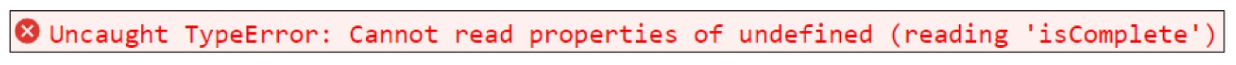

#### v-for와 v-if 해결법 2가지 
1. computed 활용 

2. v-for와 <template> 요소 활용

#### v-for와 v-if 해결법
1. computed를 활용해 이미 필터링 된 목록을 반환하여 반복하도록 설정 
```js
const completeTodos = computed(() => { 
    return todos.value.filter((todo) => ! todo.isComplete) 
}) 

<ul> 
    <li v-for="todo in completeTodos" : key="todo.id"> 
        {{ todo.name }} 
    </li> 
</ul>
```
2. v-for와 template 요소를 사용하여 v-if 위치를 이동 
```html
<ul> 
    <template v-for="todo in todos" :key="todo.id"> 
        <li v-if="!todo.isComplete"> 
            {{ todo.name }} 
        </li> 
    </template> 
</ul>
```


## Watchers

### watch

#### watch() 
하나 이상의 반응형 데이터를 감시하고, 감시하는 데이터가 변경되면 콜백 함수를 호출

#### watch 구조 
```js
watch(source, (newValue, oldValue) => { 
    // do something 
}) 
```
- 첫번째 인자 (source) 
    - watch가 감시하는 대상 (반응형 변수, 값을 반환하는 함수 등) 

- 두번째 인자(callback function) 
    - source가 변경될 때 호출되는 콜백 함수 
    1. newValue 
        - 감시하는 대상이 변화된 값 
    2. oldValue (optional) 
        - 감시 하는 대상의 기존 값

#### watch 기본 동작 
```html
<!-- watcher.html -->
<button @click="count++">Add 1</button> 
<p>Count: {{ count }}</p> 
```
```js
const count = ref(0) 

watch(count, (newValue, oldValue) => { 
    console.log(newValue: ${newValue}, oldValue: ${oldValue}`) 
})
```
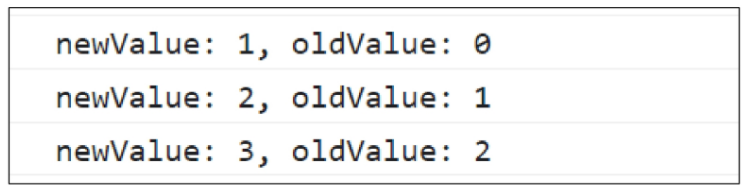

#### watch 예시
감시하는 변수에 변화가 생겼을 때 연관 데이터 업데이트하기 
```js
<input v-model="message"> 
<p>Message length: {{ messageLength }}</p>
```
```js
const message = ref('') 
const messageLength = ref(0) 
watch(message, (newValue) => { 
    messageLength.value = newValue.length
}) 
```
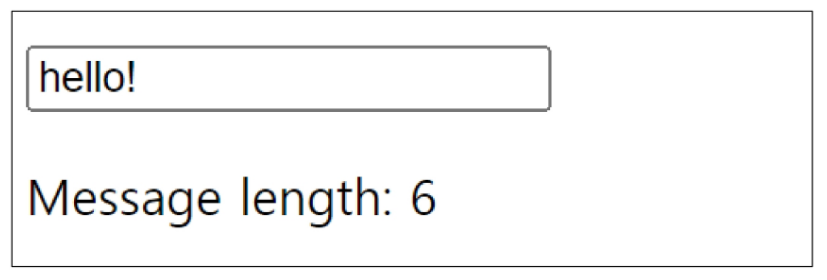

#### 여러 source를 감시하는 watch 
배열을 활용하여 여러 대상을 감시할 수 있음
```js
watch([foo, bar], ([newFoo, newBar], [prevFoo, prevBar]) => { 
    /* ... */
}) 
```

### computed vs. watch

#### Computed와 Watchers
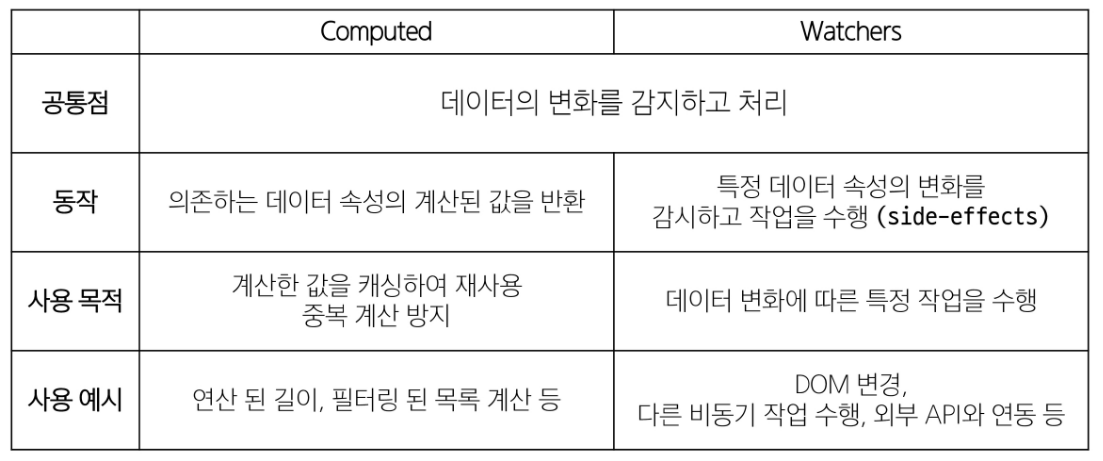
- `computed와 watch 모두 의존(감시)하는 원본 데이터를 직접 변경하지 않음`

## Lifecycle Hooks

### Lifecycle Hooks 
Vue 컴포넌트의 생성부터 소멸까지 각 단계에서 실행되는 함수

#### Lifecycle Hooks Diagram 
- 컴포넌트의 생애 주기 중간 중간에 함수를 제공
 
- > 개발자는 컴포넌트의 특정 시점에 원하는 로직을 실행할 수 있음

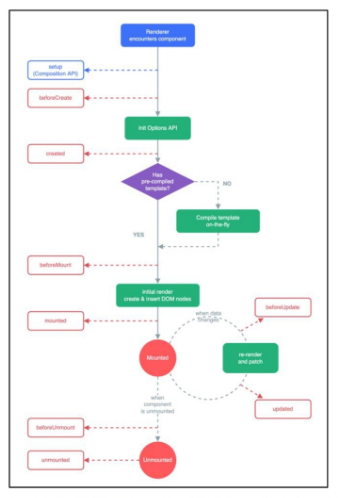

https://vuejs.org/guide/essentials/lifecycle.html#lifecycle-diagram

#### Lifecycle Hooks 활용 예시 - Mounting 
1. Vue 컴포넌트 인스턴스가 초기 렌더링 및 DOM 요소 생성이 완료된 후 특정 로직을 수행하기 
```html
<!-- lifecycle-hooks.html --> 
```
```js
const { createApp, ref, onMounted } = Vue 

setup() { 
    onMounted(() => { 
        console.log('mounted') 
    } 
})
```
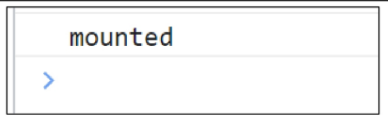

#### Lifecycle Hooks 활용 예시 - Updating
2. 반응형 데이터의 변경으로 인해 컴포넌트의 DOM이 업데이트된 후 특정 로직을 수행하기 
```js
<button @click="count++">Add 1</button> 
<p>Count: {{ count }}</p> 
<p>{{ message }}</p> 

const { createApp, ref, onMounted, onUpdated } = Vue

const count = ref(0) 
const message = ref(null) 

onUpdated(() => { 
    message.value = 'updated!' 
})
```
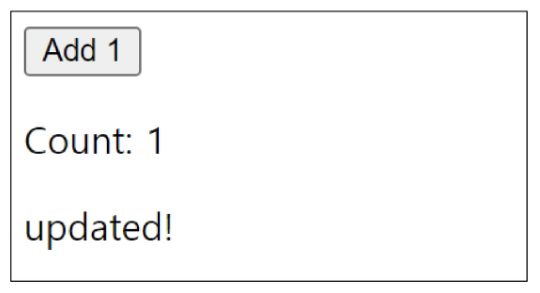

#### 주요 Lifecycle Hooks 
- 생성 단계 / 마운트 단계 / 업데이트 단계 / 소멸 단계 등 다양한 단계 존재 

- 가장 일반적으로 사용되는 것은 onMounted, onUpdated, onUnmounted 
- https://vuejs.org/api/composition-api-lifecycle.html

## Vue Style Guide

### Vue Style Guide 
- Vue의 스타일 가이드 규칙은 우선순위에 따라 4가지 범주로 나뉨 

- 규칙 범주 
    - 우선순위 A: 필수 (Essential) 
    - 우선순위 B: 적극 권장 (Strongly Recommended) 
    - 우선순위 C: 권장 (Recommended) 
    - 우선순위 D: 주의 필요 (Use with Caution) 
- https://vuejs.org/style-guide/

#### 우선순위 별 특징 
- A: 필수 (Essential)
    - 오류를 방지하는 데 도움이 되므로 어떤 경우에도 규칙을 학습하고 준수 

- B: 적극 권장 (Strongly Recommended) 
    - 가독성 및/또는 개발자 경험을 향상시킴 
    - 규칙을 어겨도 코드는 여전히 실행되겠지만, 정당한 사유가 있어야 규칙을 위반할 수 있음 
- C: 권장 (Recommended) 
    - 일관성을 보장하도록 임의의 선택을 할 수 있음 
- D: 주의 필요 (Use with Caution) 
    - 잠재적 위험 특성을 고려함

#### 우선순위 A였던 금일 학습 내용 
1. v-for에 key 작성하기 

2. 동일 요소에 v-if와 v-for 함께 사용하지 않기

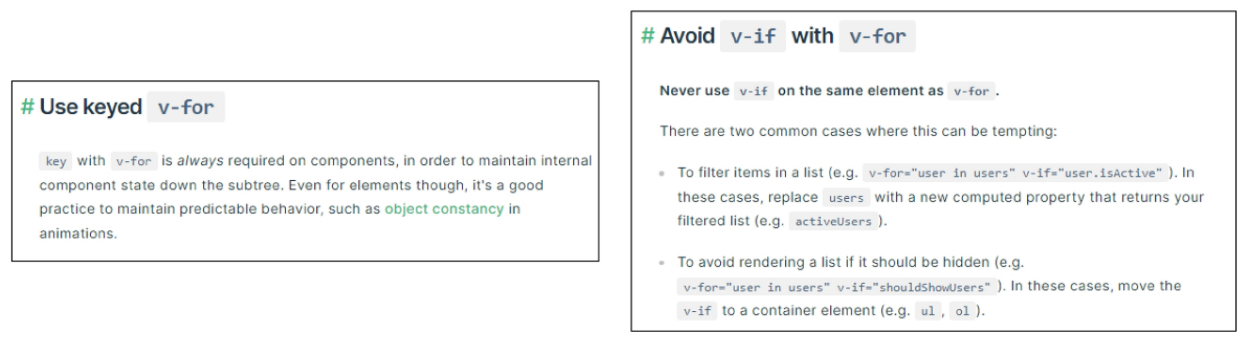


## 참고

### computed 주의사항

#### 1. computed의 반환 값은 변경하지 말 것 
- computed의 반환 값은 의존하는 데이터의 파생된 값 
    - 이미 의존하는 데이터에 의해 계산이 완료된 값 

- 일종의 snapshot이며 의존하는 데이터가 변경될 때만 새 snapshot이 생성됨 
- 계산된 값은 읽기 전용으로 취급되어야 하며 변경되어서는 안됨
- 대신 새 값을 얻기 위해서는 의존하는 데이터를 업데이트 해야 함

#### 2. computed 사용 시 원본 배열 변경하지 말 것 
computed에서 reverse() 및 sort() 사용시 원본 배열을 변경하기 때문에 원본 배열의 복사본을 만들어서 진행 해야 함

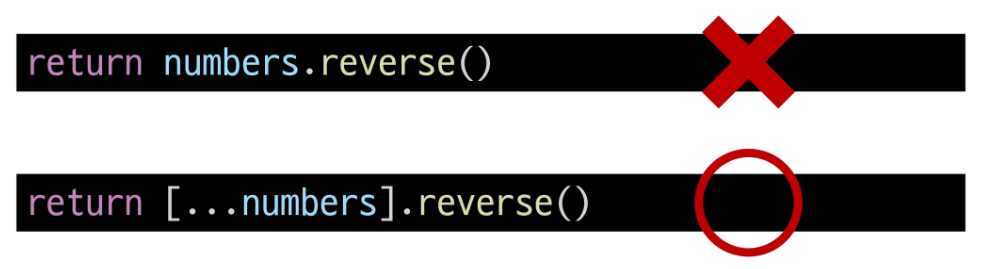

### Lifecycle Hooks 주의사항

#### Lifecycle Hooks는 동기적으로 작성할 것
1. 컴포넌트 상태의 일관성 유지 
    - 컴포넌트의 생명주기 동안 상태가 예측 가능하고 일관되게 유지되도록 보장 
   - 비동기적으로 실행될 경우, 컴포넌트의 상태가 예상치 못한 시점에 변경될 수 있어 버그 발생 가능성이 높아짐 

2. Vue 내부 메커니즘과의 동기화 
   - Vue의 내부 로직은 컴포넌트의 라이프사이클에 맞춰 최적화되어 있음 
   - 동기적 실행을 통해 Vue의 내부 프로세스와 개발자가 작성한 코드가 정확히 동기화될 수 있음

- 비동기적으로 작성한 lifecycle hook 예시 
```js
setTimeout(() => { 
    onMounted(() => { 
        console.log('이 코드는 실행되지 않습니다!') 
    }) 
}, 100)
```

### 배열과 v-for 관련

#### 배열 변경 관련 메서드 
- v-for와 배열을 함께 사용 시 배열의 메서드를 주의해서 사용해야 함 

1. 변화 메서드 
   - 호출하는 원본 배열을 변경 
   - push(), pop(), shift(), unshift(), splice(), sort(), reverse() 
2. 배열 교체 
   - 원본 배열을 수정하지 않고 항상 새 배열을 반환 
   - filter(), concat(), slice()

#### v-for와 배열을 활용해 “필터링/정렬” 활용하기
- 원본 데이터를 수정하거나 교체하지 않고 필터링하거나 정렬된 새로운 데이터를 표시하는 방법 
    1. computed 활용 
    2. method 활용 (computed가 불가능한 중첩된 v-for에 경우 사용)

1. computed 활용 
    - 원본 기반으로 필터링 된 새로운 결과를 생성 
```js
const numbers = ref([1, 2, 3, 4, 5]) 

const evenNumbers = computed(() => { 
    return numbers.value.filter((number) => number % 2 === 0)
})  

<li v-for="num in evenNumbers">{{ num }}</li>
```

2. method 활용 
    - computed가 불가능한 중첩된 v-for에 경우 
```js
const numberSets = ref([ 
    [1, 2, 3, 4, 5], 
    [6, 7, 8, 9, 10] 
]) 

const evenNumbers = function (numbers) { 
    return numbers.filter((number) => number % 2 === 0) 
} 

<ul v-for="numbers in numberSets"> 
    <li v-for="num in evenNumbers (numbers)">{{ num }}</li> 
</ul>
```

#### ※주의※ 배열의 인덱스를 v-for의 key로 사용하지 말 것
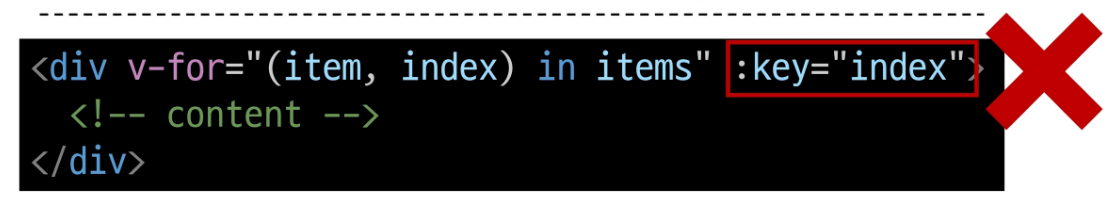

- 인덱스는 식별자가 아닌 배열의 항목 위치만 나타내기 때문 

- 만약 새 요소가 배열의 끝이 아닌 위치 삽입되면 이미 반복된 구성 요소 데이터가 함께 업데이트되지 않기 때문 
- > 직접 고유한 값을 만들어내는 메서드를 만들거나 외부 라이브러리 등을 활용하는 등 식별자 역할을 할 수 있는 값을 만들어 사용